In [29]:
#Required Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score



In [5]:
#Load Dataset
df = pd.read_csv("global air pollution dataset.csv")
df.head()


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [6]:
#Basic Information About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [7]:
#Check for Missing Values
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [8]:
#Statistical Summary
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


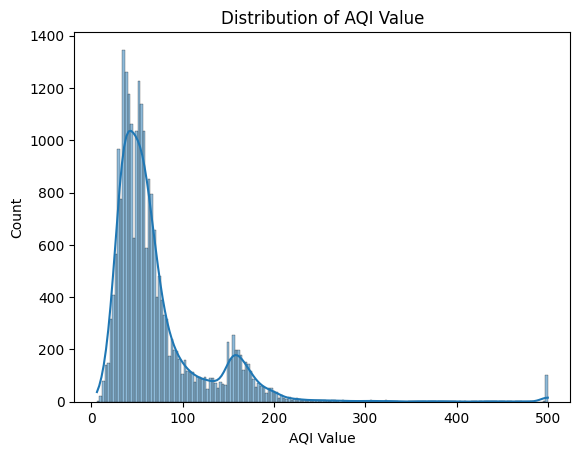

In [9]:
#Target Variable Distribution (AQI Value)
plt.figure()
sns.histplot(df["AQI Value"], kde=True)
plt.title("Distribution of AQI Value")
plt.show()

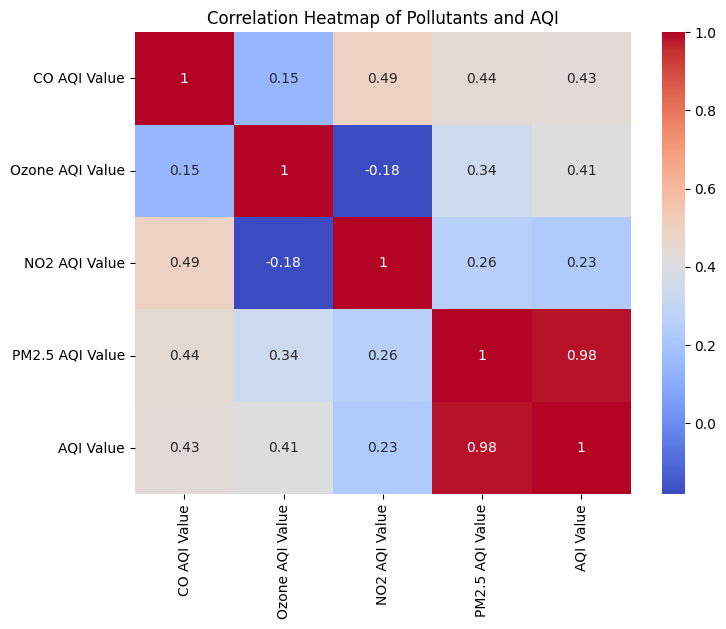

In [10]:
#Correlation Heatmap (Numeric AQI Values)
numeric_cols = [
    "CO AQI Value",
    "Ozone AQI Value",
    "NO2 AQI Value",
    "PM2.5 AQI Value",
    "AQI Value"
]

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()


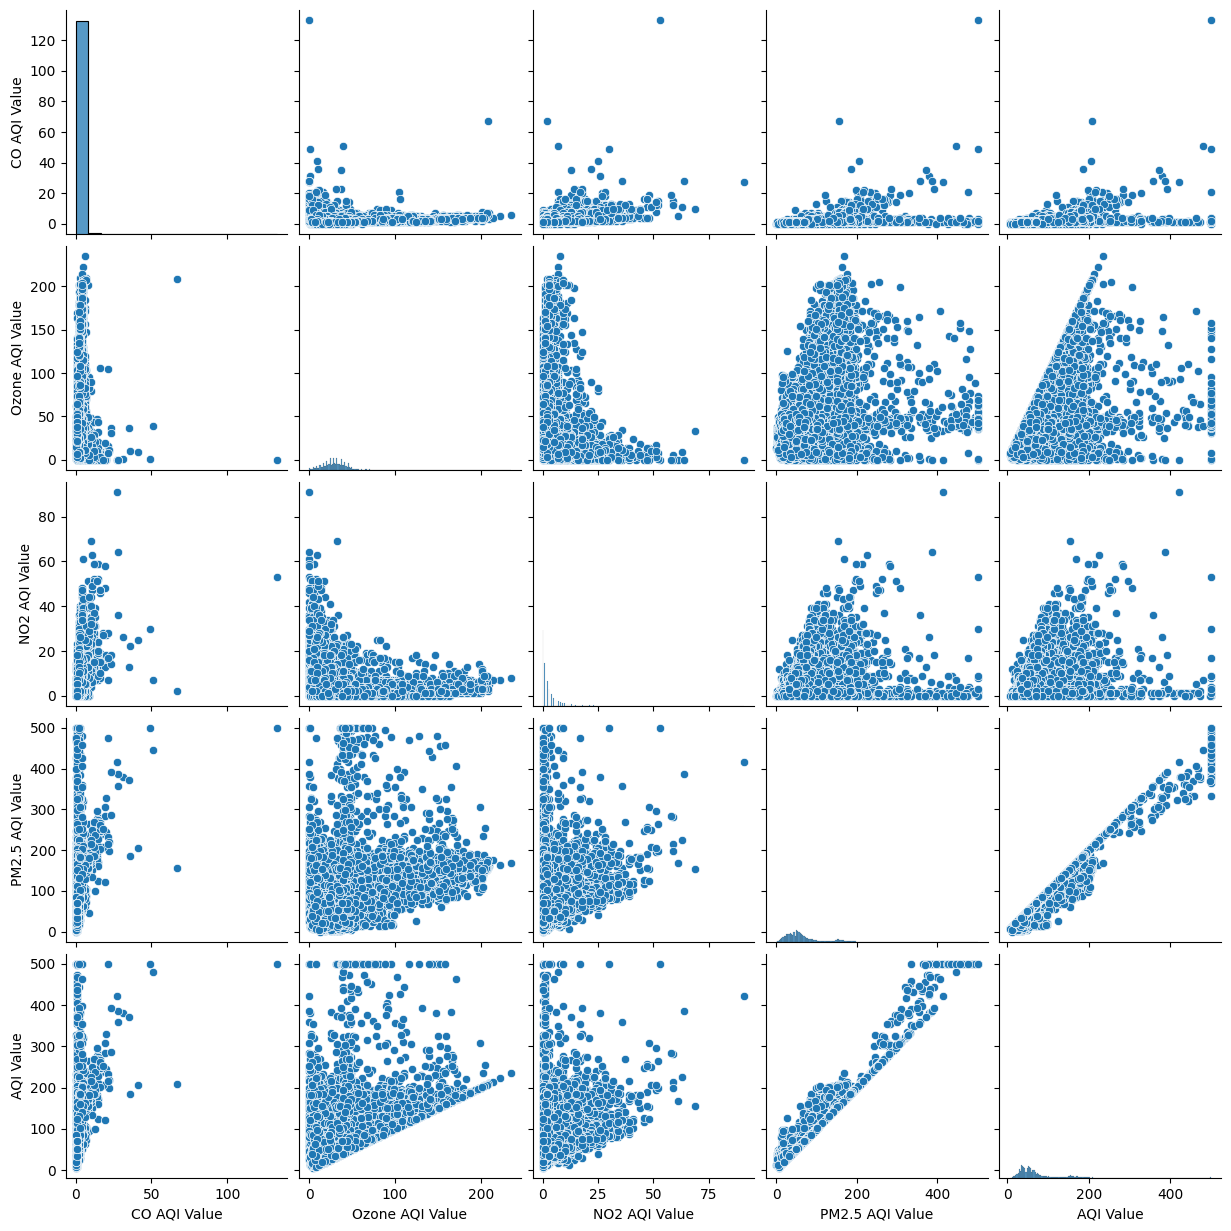

In [11]:
#(Visualization 1): Pair Plot
sns.pairplot(df[numeric_cols])
plt.show()


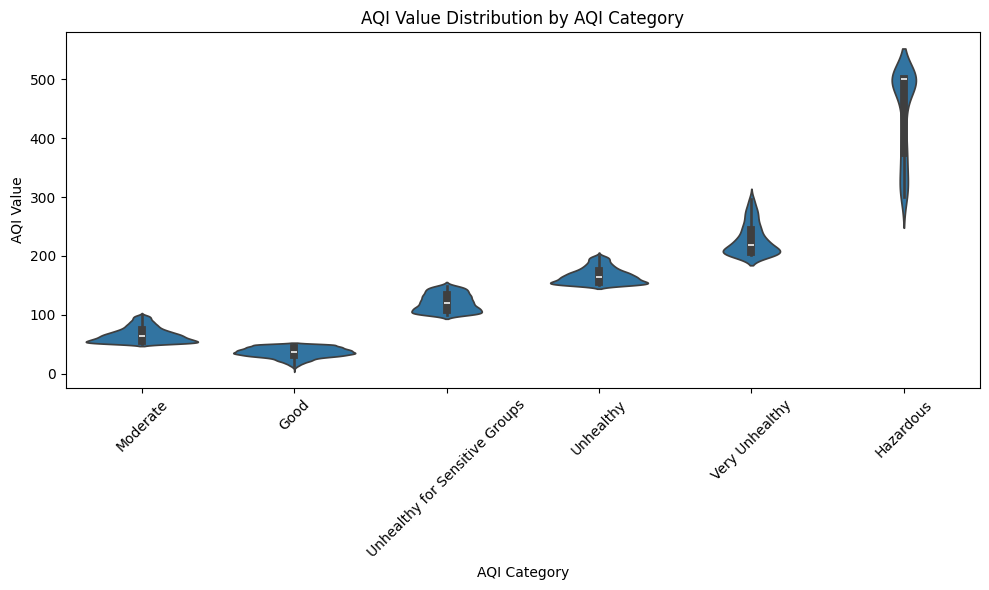

In [ ]:
#(Visualization 2): Violin Plot (AQI by Category)
plt.figure(figsize=(10,6))
sns.violinplot(x="AQI Category", y="AQI Value", data=df)
plt.title("AQI Value Distribution by AQI Category")
plt.xticks(rotation=45)   
plt.tight_layout()        
plt.show()


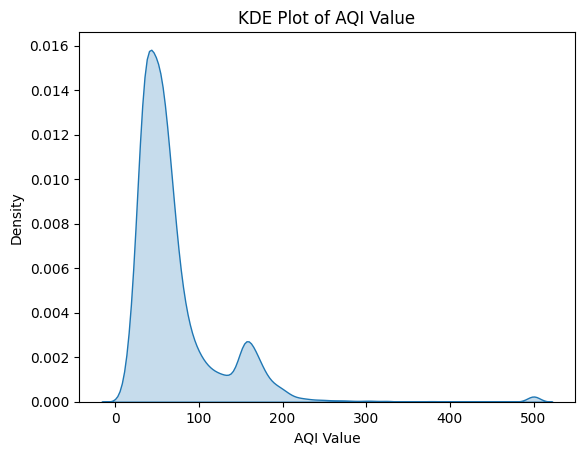

In [14]:
#(Visualization 3): KDE Plot
plt.figure()
sns.kdeplot(df["AQI Value"], fill=True)
plt.title("KDE Plot of AQI Value")
plt.show()


In [15]:
#Drop High Cardinality Columns
df_model = df.drop(columns=["City", "Country"])


In [16]:
#Encode Ordinal AQI Categories
ordinal_cols = [
    "AQI Category",
    "CO AQI Category",
    "Ozone AQI Category",
    "NO2 AQI Category",
    "PM2.5 AQI Category"
]

encoder = OrdinalEncoder()
df_model[ordinal_cols] = encoder.fit_transform(df_model[ordinal_cols])


In [17]:
#Define Features and Target
X = df_model.drop(columns=["AQI Value"])
y = df_model["AQI Value"]


In [18]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
#Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
#ElasticNet with Hyperparameter Tuning
param_grid = {
    "alpha": [0.01, 0.1, 1, 10],
    "l1_ratio": [0.2, 0.5, 0.8]
}

elastic = ElasticNet(max_iter=10000)

grid = GridSearchCV(
    elastic,
    param_grid,
    cv=5,
    scoring="r2"
)

grid.fit(X_train_scaled, y_train)


,estimator,ElasticNet(max_iter=10000)
,param_grid,"{'alpha': [0.01, 0.1, ...], 'l1_ratio': [0.2, 0.5, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [21]:
#Best Hyperparameters
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.8}

In [22]:
#Train Final ElasticNet Model
best_model = grid.best_estimator_
best_model.fit(X_train_scaled, y_train)


,alpha,0.01
,l1_ratio,0.8
,fit_intercept,True
,precompute,False
,max_iter,10000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [23]:
#Predictions
y_pred = best_model.predict(X_test_scaled)


In [30]:
#Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)


print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("MSE:", mse)
print("Explained Variance:", evs)

R2 Score: 0.9787070197269048
MAE: 4.71743312613671
RMSE: 8.237300954432294
MSE: 67.85312701389118
Explained Variance: 0.9787133042917843


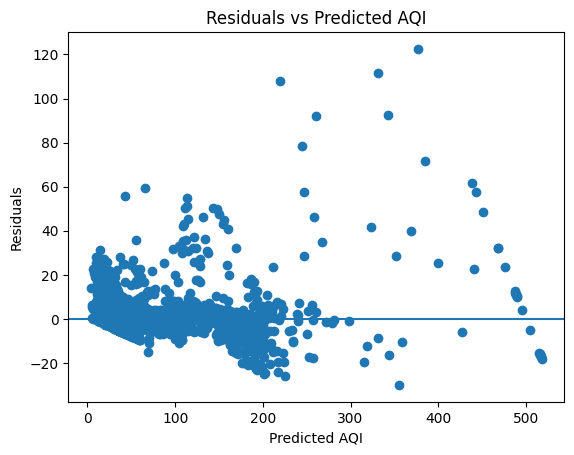

In [25]:
#(Visualization 4): Residuals vs Predictions
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted AQI")
plt.show()


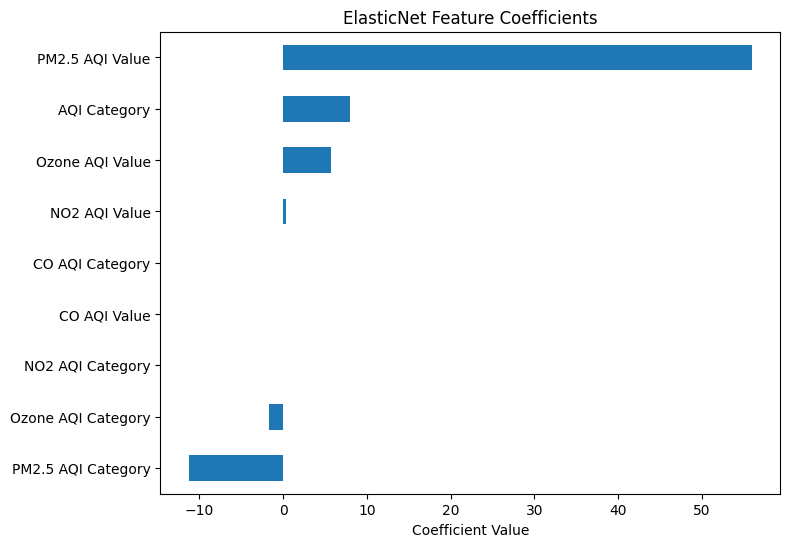

In [26]:
#Visualization 5): ElasticNet Coefficient Plot
coefficients = pd.Series(
    best_model.coef_,
    index=X.columns
).sort_values()

plt.figure(figsize=(8,6))
coefficients.plot(kind="barh")
plt.title("ElasticNet Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.show()


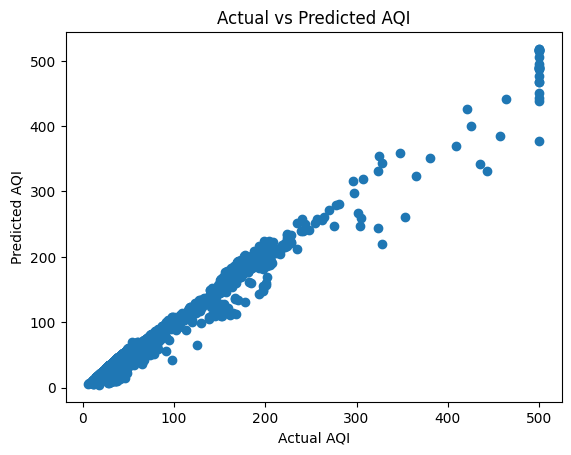

In [28]:
#(Extra): Actual vs Predicted AQI
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()